<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [21]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
boston_df.dtypes

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
LSTAT         float64
MEDV          float64
dtype: object

In [8]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [10]:
boston_df.drop(["CRIM","Unnamed: 0", ], axis = 1, inplace=True)

In [11]:
boston_df.describe()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


For the "Median value of owner-occupied homes" provide a boxplot

Provide a  bar plot for the Charles river variable

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Create a histogram for the pupil to teacher ratio variable

·      MEDV - Median value of owner-occupied homes in $1000's
·      AGE - proportion of owner-occupied units built prior to 1940

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      INDUS - proportion of non-retail business acres per town.
·      NOX - nitric oxides concentration (parts per 10 million)

·      PTRATIO - pupil-teacher ratio by town



In [12]:
boston_df.drop(["ZN","RM","DIS","RAD","TAX","LSTAT", ], axis = 1, inplace=True)

In [13]:
boston_df.describe()

,INDUS,CHAS,NOX,AGE,PTRATIO,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,11.136779,0.069170,0.554695,68.574901,18.455534,22.532806
std,6.860353,0.253994,0.115878,28.148861,2.164946,9.197104
min,0.460000,0.000000,0.385000,2.900000,12.600000,5.000000
25%,5.190000,0.000000,0.449000,45.025000,17.400000,17.025000
50%,9.690000,0.000000,0.538000,77.500000,19.050000,21.200000
75%,18.100000,0.000000,0.624000,94.075000,20.200000,25.000000
max,27.740000,1.000000,0.871000,100.000000,22.000000,50.000000


## Median value of owner-occupied homes in $1000's

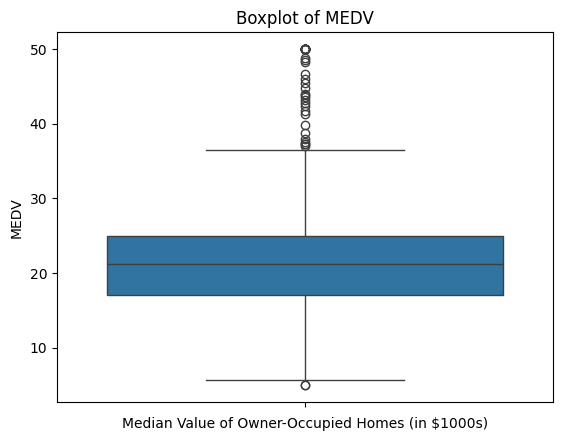

In [27]:
sns.boxplot(data=boston_df['MEDV'])
plt.xlabel('Median Value of Owner-Occupied Homes (in $1000s)')
plt.title('Boxplot of MEDV')
plt.show()

## Boxplot for the MEDV variable vs the AGE variable

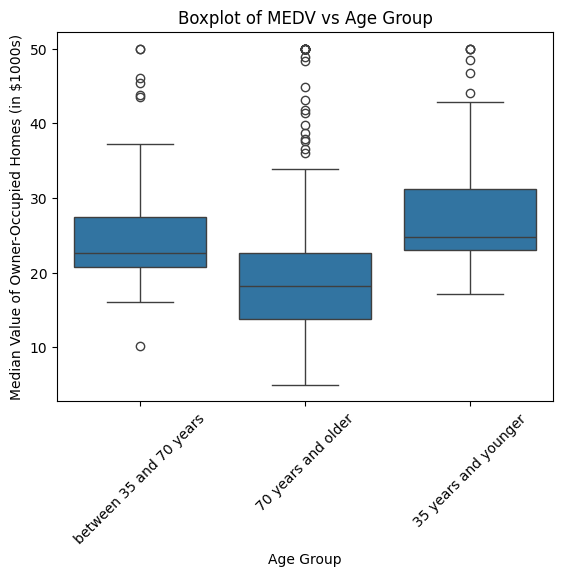

In [28]:
# Discretize the AGE variable into three groups
def discretize_age(age):
    if age <= 35:
        return '35 years and younger'
    elif age > 35 and age <= 70:
        return 'between 35 and 70 years'
    else:
        return '70 years and older'

# Apply the discretization function to create a new column 'AGE_group'
boston_df['AGE_group'] = boston_df['AGE'].apply(discretize_age)

# Create a boxplot for MEDV vs AGE_group
sns.boxplot(data=boston_df, x='AGE_group', y='MEDV')

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Median Value of Owner-Occupied Homes (in $1000s)')
plt.title('Boxplot of MEDV vs Age Group')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

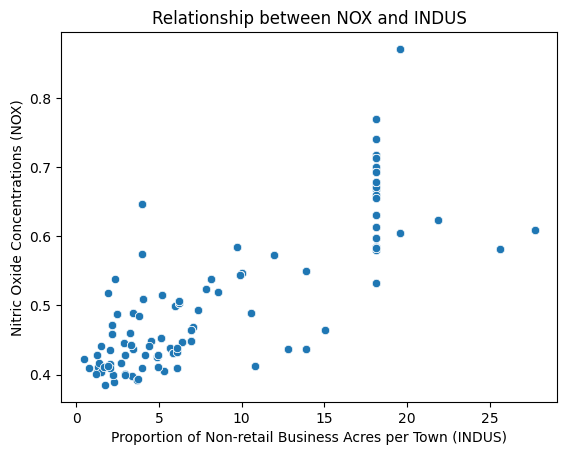

In [29]:
# Create a scatter plot
sns.scatterplot(data=boston_df, x='INDUS', y='NOX')

# Add labels and title
plt.xlabel('Proportion of Non-retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxide Concentrations (NOX)')
plt.title('Relationship between NOX and INDUS')

# Show the plot
plt.show()

NOX levels tend to increast as Non-retail Business Acres increase per town.

# Must be the Cows!

## Histogram for the pupil to teacher ratio variable.

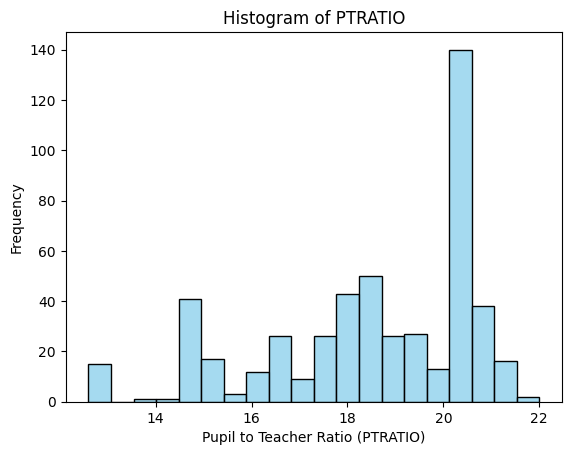

In [31]:
# Create a histogram using Seaborn
sns.histplot(boston_df['PTRATIO'], bins=20, kde=False, color='skyblue')

# Add labels and title
plt.xlabel('Pupil to Teacher Ratio (PTRATIO)')
plt.ylabel('Frequency')
plt.title('Histogram of PTRATIO')

# Show the plot
plt.show()